# Aim of the notebook

This notebook is used to identify tissue domains using SpaGCN

In [1]:
import platform
platform.python_version()

'3.8.8'

### 2. Import python modules

In [3]:
import os,csv,re
import pandas as pd
import numpy as np
import scanpy as sc
import math
import SpaGCN as spg
from scipy.sparse import issparse
import random, torch
import warnings
warnings.filterwarnings("ignore")
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import SpaGCN as spg
#In order to read in image data, we need to install some package. Here we recommend package "opencv"
#inatll opencv in python
#!pip3 install opencv-python
import cv2
import tiffile as tff

### 3. Read in data
The current version of SpaGCN requres three input data: 
<br>
1. The gene expression matrix(n by k): expression_matrix.h5;
<br>
2. Spatial coordinateds of samplespositions.txt;
<br>
3. Histology image(optional): histology.tif, can be tif or png or jepg.
<br>
The gene expreesion data can be stored as an AnnData object. AnnData stores a data matrix .X together with annotations of observations .obs, variables .var and unstructured annotations .uns. 

In [4]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_multisection_nuclei_r1_with_annotations.h5ad')
adata.X=adata.layers['raw']

### Select ROI2

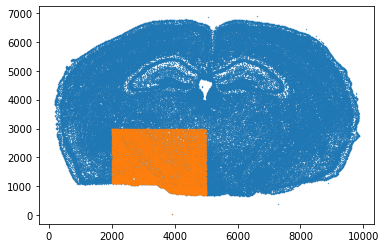

In [5]:
adata2=adata[(adata.obs['x_centroid']<5000)&(adata.obs['x_centroid']>2000)&(adata.obs['y_centroid']<3000)]
plt.scatter(adata.obs.loc[:,'x_centroid'],adata.obs.loc[:,'y_centroid'],s=0.1)
plt.scatter(adata2.obs.loc[:,'x_centroid'],adata2.obs.loc[:,'y_centroid'],s=0.1)
adata=adata2

### 4. Integrate gene expression and histology into a Graph

### 5. Spatial domain detection using SpaGCN

#### 5.1 Expression data preprocessing

#### 5.2 Set hyper-parameters

- p: Percentage of total expression contributed by neighborhoods.
- l: Parameter to control p.

Calculateing adj matrix using xy only...
Run 1: l [0.01, 100], p [0.0, 10.19555377960205]
Run 2: l [0.01, 50.005], p [0.0, 2.1740055084228516]
Run 3: l [25.0075, 50.005], p [0.2631831169128418, 2.1740055084228516]
Run 4: l [25.0075, 37.50625], p [0.2631831169128418, 0.9969006776809692]
Run 5: l [25.0075, 31.256875], p [0.2631831169128418, 0.5689094066619873]
Run 6: l [25.0075, 28.1321875], p [0.2631831169128418, 0.40022218227386475]
Run 7: l [25.0075, 26.56984375], p [0.2631831169128418, 0.3277132511138916]
recommended l =  25.788671875
Start at res =  0.45 step =  0.1
Initializing cluster centers with louvain, resolution =  0.45


2024-06-05 09:17:16.371285: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sergio/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-11.4/include:/usr/local/cuda-11.4/lib64:/usr/local/cuda-11.4/include:/usr/local/cuda-11.4/lib64:
2024-06-05 09:17:16.371318: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch  0
Epoch  10
delta_label  0.004755543681538872 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.45 Num of clusters =  17
Initializing cluster centers with louvain, resolution =  0.35
Epoch  0
Epoch  10
delta_label  0.004595244456318461 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.35 Num of clusters =  15
Res changed to 0.35
Initializing cluster centers with louvain, resolution =  0.24999999999999997
Epoch  0
Epoch  10
delta_label  0.0042212129308041675 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.24999999999999997 Num of clusters =  14
Res changed to 0.24999999999999997
Initializing cluster centers with louvain, resolution =  0.14999999999999997
Epoch  0
Epoch  10
delta_label  0.004274646005877639 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.14999999999999997 Num of clusters =  13
Res changed to 0.14999999999999997
Initializing cl

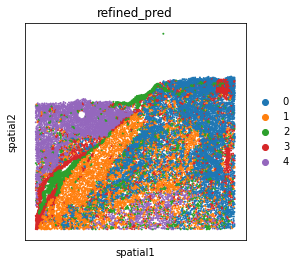

Start at res =  0.5 step =  0.1
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.0037403152551429334 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  18
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.0039006144803633448 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  17
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
delta_label  0.002885386053967406 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.30000000000000004 Num of clusters =  15
Res changed to 0.30000000000000004
Initializing cluster centers with louvain, resolution =  0.20000000000000004
Epoch  0
Epoch  10
delta_label  0.004274646005877639 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.

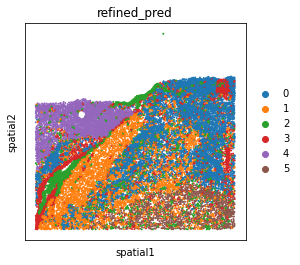

Start at res =  0.7 step =  0.1
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Epoch  10
delta_label  0.004595244456318461 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.7 Num of clusters =  20
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Epoch  10
delta_label  0.0037403152551429334 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.6 Num of clusters =  18
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.0037403152551429334 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  18
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.0039006144803633448 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  17
Res changed to 0.4
Initializing cluster

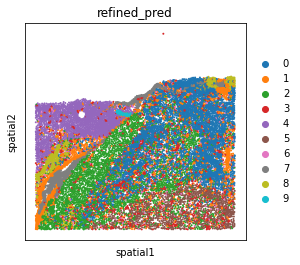

Start at res =  1.0 step =  0.1
Initializing cluster centers with louvain, resolution =  1.0
Epoch  0
Epoch  10
Res =  1.0 Num of clusters =  23
Initializing cluster centers with louvain, resolution =  0.9
Epoch  0
Epoch  10
Res =  0.9 Num of clusters =  22
Res changed to 0.9
Initializing cluster centers with louvain, resolution =  0.8
Epoch  0
Epoch  10
delta_label  0.004969275981832754 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.8 Num of clusters =  22
Res changed to 0.8
Initializing cluster centers with louvain, resolution =  0.7000000000000001
Epoch  0
Epoch  10
delta_label  0.004595244456318461 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.7000000000000001 Num of clusters =  20
Res changed to 0.7000000000000001
Initializing cluster centers with louvain, resolution =  0.6000000000000001
Epoch  0
Epoch  10
delta_label  0.0037403152551429334 < tol  0.005
Reach tolerance threshold. Stopping training.
Total e

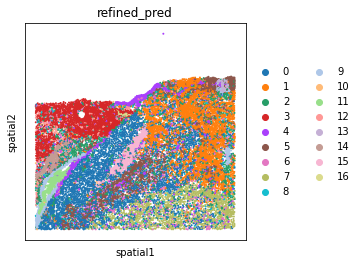

Run 1: l [0.01, 100], p [0.0, 10.19555377960205]
Run 2: l [0.01, 50.005], p [0.0, 2.1740055084228516]
Run 3: l [25.0075, 50.005], p [0.2631831169128418, 2.1740055084228516]
Run 4: l [25.0075, 37.50625], p [0.2631831169128418, 0.9969006776809692]
Run 5: l [25.0075, 31.256875], p [0.2631831169128418, 0.5689094066619873]
Run 6: l [28.1321875, 31.256875], p [0.40022218227386475, 0.5689094066619873]
Run 7: l [29.69453125, 31.256875], p [0.48065614700317383, 0.5689094066619873]
Run 8: l [29.69453125, 30.475703125000003], p [0.48065614700317383, 0.5238136053085327]
recommended l =  30.085117187500003
Start at res =  0.45 step =  0.1
Initializing cluster centers with louvain, resolution =  0.45
Epoch  0
Epoch  10
delta_label  0.003580016029922522 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.45 Num of clusters =  16
Initializing cluster centers with louvain, resolution =  0.35
Epoch  0
Epoch  10
delta_label  0.003580016029922522 < tol  0.005
Reach toleranc

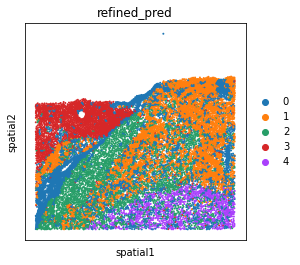

Start at res =  0.5 step =  0.1
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.00336628372962864 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  16
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.0036334491049959923 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  16
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
delta_label  0.004915842906759284 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.30000000000000004 Num of clusters =  14
Res changed to 0.30000000000000004
Initializing cluster centers with louvain, resolution =  0.20000000000000004
Epoch  0
Epoch  10
delta_label  0.00448837830617152 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.200

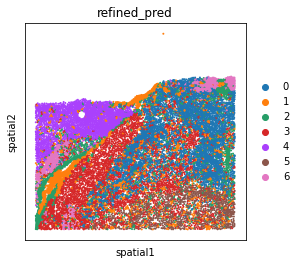

Start at res =  0.7 step =  0.1
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Epoch  10
Res =  0.7 Num of clusters =  21
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Epoch  10
Res =  0.6 Num of clusters =  17
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.00336628372962864 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  16
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.0036334491049959923 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  16
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
delta_label  0.004915842906759284 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 16
Res =  0.30000000000000004 Num of cl

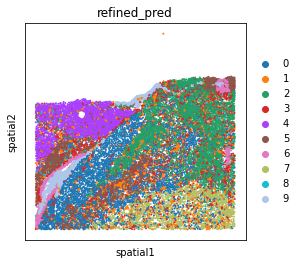

Start at res =  1.0 step =  0.1
Initializing cluster centers with louvain, resolution =  1.0
Epoch  0
Epoch  10
Res =  1.0 Num of clusters =  23
Initializing cluster centers with louvain, resolution =  0.9
Epoch  0
Epoch  10
Res =  0.9 Num of clusters =  21
Res changed to 0.9
Initializing cluster centers with louvain, resolution =  0.8
Epoch  0
Epoch  10
delta_label  0.004648677531391932 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.8 Num of clusters =  21
Res changed to 0.8
Initializing cluster centers with louvain, resolution =  0.7000000000000001
Epoch  0
Epoch  10
Res =  0.7000000000000001 Num of clusters =  21
Res changed to 0.7000000000000001
Initializing cluster centers with louvain, resolution =  0.6000000000000001
Epoch  0
Epoch  10
Res =  0.6000000000000001 Num of clusters =  17
Res changed to 0.6000000000000001
Initializing cluster centers with louvain, resolution =  0.5000000000000001
Epoch  0
Epoch  10
delta_label  0.00336628372962864 

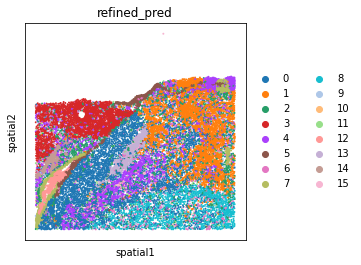

Run 1: l [0.01, 100], p [0.0, 10.19555377960205]
Run 2: l [0.01, 50.005], p [0.0, 2.1740055084228516]
Run 3: l [25.0075, 50.005], p [0.2631831169128418, 2.1740055084228516]
Run 4: l [25.0075, 37.50625], p [0.2631831169128418, 0.9969006776809692]
Run 5: l [31.256875, 37.50625], p [0.5689094066619873, 0.9969006776809692]
Run 6: l [31.256875, 34.3815625], p [0.5689094066619873, 0.7682720422744751]
Run 7: l [32.819218750000005, 34.3815625], p [0.6648380756378174, 0.7682720422744751]
Run 8: l [32.819218750000005, 33.600390625], p [0.6648380756378174, 0.7156283855438232]
recommended l =  33.209804687500004
Start at res =  0.45 step =  0.1
Initializing cluster centers with louvain, resolution =  0.45
Epoch  0
Epoch  10
delta_label  0.00448837830617152 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.45 Num of clusters =  17
Initializing cluster centers with louvain, resolution =  0.35
Epoch  0
Epoch  10
delta_label  0.0038471814052898744 < tol  0.005
Reach t

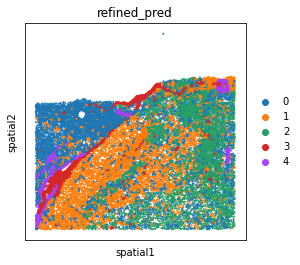

Start at res =  0.5 step =  0.1
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.0040609137055837565 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  19
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.00448837830617152 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  18
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
delta_label  0.004328079080951109 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.30000000000000004 Num of clusters =  15
Res changed to 0.30000000000000004
Initializing cluster centers with louvain, resolution =  0.20000000000000004
Epoch  0
Epoch  10
delta_label  0.003793748330216404 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.20

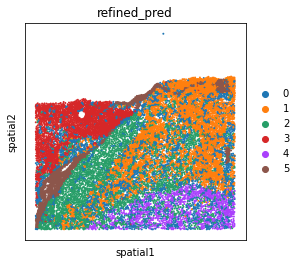

Start at res =  0.7 step =  0.1
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Epoch  10
Res =  0.7 Num of clusters =  20
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Epoch  10
Res =  0.6 Num of clusters =  18
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.0040609137055837565 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  19
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.00448837830617152 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  18
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
delta_label  0.004328079080951109 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.30000000000000004 Num of cl

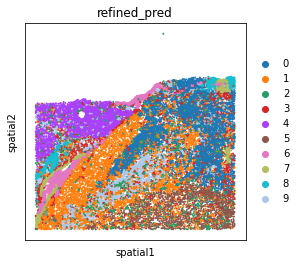

Start at res =  1.0 step =  0.1
Initializing cluster centers with louvain, resolution =  1.0
Epoch  0
Epoch  10
Res =  1.0 Num of clusters =  21
Initializing cluster centers with louvain, resolution =  0.9
Epoch  0
Epoch  10
Res =  0.9 Num of clusters =  22
Res changed to 0.9
Initializing cluster centers with louvain, resolution =  0.8
Epoch  0
Epoch  10
Res =  0.8 Num of clusters =  21
Res changed to 0.8
Initializing cluster centers with louvain, resolution =  0.7000000000000001
Epoch  0
Epoch  10
Res =  0.7000000000000001 Num of clusters =  20
Res changed to 0.7000000000000001
Initializing cluster centers with louvain, resolution =  0.6000000000000001
Epoch  0
Epoch  10
Res =  0.6000000000000001 Num of clusters =  18
Res changed to 0.6000000000000001
Initializing cluster centers with louvain, resolution =  0.5000000000000001
Epoch  0
Epoch  10
delta_label  0.0040609137055837565 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5000000000000001 Num of

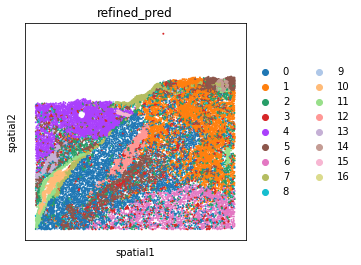

Run 1: l [0.01, 100], p [0.0, 10.19555377960205]
Run 2: l [0.01, 50.005], p [0.0, 2.1740055084228516]
Run 3: l [25.0075, 50.005], p [0.2631831169128418, 2.1740055084228516]
Run 4: l [25.0075, 37.50625], p [0.2631831169128418, 0.9969006776809692]
Run 5: l [31.256875, 37.50625], p [0.5689094066619873, 0.9969006776809692]
Run 6: l [34.3815625, 37.50625], p [0.7682720422744751, 0.9969006776809692]
Run 7: l [35.94390625, 37.50625], p [0.8790243864059448, 0.9969006776809692]
Run 8: l [35.94390625, 36.725078124999996], p [0.8790243864059448, 0.937084436416626]
recommended l =  36.3344921875
Start at res =  0.45 step =  0.1
Initializing cluster centers with louvain, resolution =  0.45
Epoch  0
Epoch  10
delta_label  0.004328079080951109 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.45 Num of clusters =  17
Initializing cluster centers with louvain, resolution =  0.35
Epoch  0
Epoch  10
delta_label  0.003954047555436815 < tol  0.005
Reach tolerance threshol

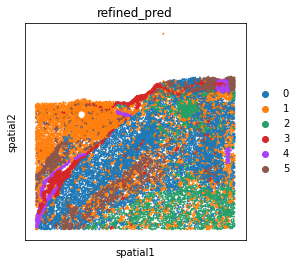

Start at res =  0.5 step =  0.1
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.004808976756612343 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  18
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.004007480630510286 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  17
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
Res =  0.30000000000000004 Num of clusters =  16
Res changed to 0.30000000000000004
Initializing cluster centers with louvain, resolution =  0.20000000000000004
Epoch  0
Epoch  10
delta_label  0.003580016029922522 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.20000000000000004 Num of clusters =  13
Res changed to 0.20000000000000004
Initializing cluster centers with lo

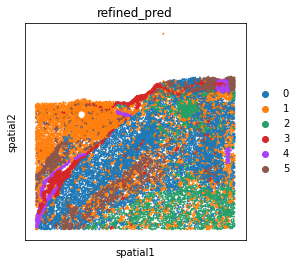

Start at res =  0.7 step =  0.1
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Epoch  10
delta_label  0.004808976756612343 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.7 Num of clusters =  20
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Epoch  10
Res =  0.6 Num of clusters =  18
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Epoch  10
delta_label  0.004808976756612343 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.5 Num of clusters =  18
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Epoch  10
delta_label  0.004007480630510286 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.4 Num of clusters =  17
Res changed to 0.4
Initializing cluster centers with louvain, resolution =  0.30000000000000004
Epoch  0
Epoch  10
Res =  0.30000000000000004 Num of cl

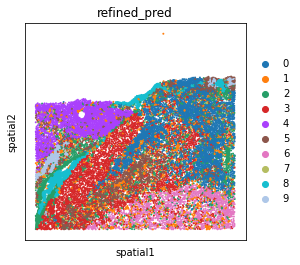

Start at res =  1.0 step =  0.1
Initializing cluster centers with louvain, resolution =  1.0
Epoch  0
Epoch  10
Res =  1.0 Num of clusters =  22
Initializing cluster centers with louvain, resolution =  0.9
Epoch  0
Epoch  10
Res =  0.9 Num of clusters =  21
Res changed to 0.9
Initializing cluster centers with louvain, resolution =  0.8
Epoch  0
Epoch  10
Res =  0.8 Num of clusters =  19
Res changed to 0.8
Initializing cluster centers with louvain, resolution =  0.7000000000000001
Epoch  0
Epoch  10
delta_label  0.004808976756612343 < tol  0.005
Reach tolerance threshold. Stopping training.
Total epoch: 19
Res =  0.7000000000000001 Num of clusters =  20
Res changed to 0.7000000000000001
Initializing cluster centers with louvain, resolution =  0.6000000000000001
Epoch  0
Epoch  10
Res =  0.6000000000000001 Num of clusters =  18
Res changed to 0.6000000000000001
Initializing cluster centers with louvain, resolution =  0.5000000000000001
Epoch  0
Epoch  10
delta_label  0.004808976756612343

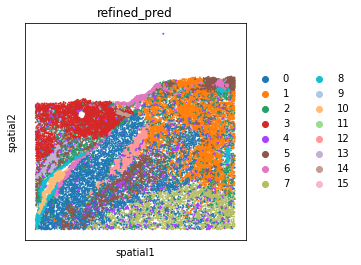

In [6]:
adata.obs['x_pixel']=adata.obs['X']
adata.obs['y_pixel']=adata.obs['Y']
adata.obs['x_array']=adata.obs['X']
adata.obs['y_array']=adata.obs['Y']
#Set coordinates
x_array=adata.obs["x_array"].tolist()
y_array=adata.obs["y_array"].tolist()
x_pixel=adata.obs["x_pixel"].tolist()
y_pixel=adata.obs["y_pixel"].tolist()

#Calculate adjacent matrix
s=0
b=49
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))
#adj=spg.calculate_adj_matrix(x=x_pixel,y=y_pixel, x_pixel=x_pixel, y_pixel=y_pixel, image=img, beta=b, alpha=s, histology=True)
#If histlogy image is not available, SpaGCN can calculate the adjacent matrix using the fnction below
adj=spg.calculate_adj_matrix(x=x_pixel,y=y_pixel, histology=False)
#np.savetxt('./data/151673/adj.csv', adj, delimiter=',')
adata.var_names_make_unique()
spg.prefilter_genes(adata,min_cells=3) # avoiding all genes are zeros
spg.prefilter_specialgenes(adata)
#Normalize and take log for UMI
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
ps=[0.3,0.5,0.7,0.9] 
for p in ps:
    #Find the l value given p
    l=spg.search_l(p, adj, start=0.01, end=100, tol=0.01, max_run=100)
    for n_clusters in ndoms:
        #Set seed
        r_seed=t_seed=n_seed=100
        #Seaech for suitable resolution
        res=spg.search_res(adata, adj, l, n_clusters, start=0.2+(0.05*n_clusters), step=0.1, tol=5e-3, lr=0.05, max_epochs=20, r_seed=r_seed, t_seed=t_seed, n_seed=n_seed)
        clf=spg.SpaGCN()
        clf.set_l(l)
        #Set seed
        random.seed(r_seed)
        torch.manual_seed(t_seed)
        np.random.seed(n_seed)
        #Run
        clf.train(adata,adj,init_spa=True,init="louvain",res=res, tol=5e-3, lr=0.05, max_epochs=200)
        y_pred, prob=clf.predict()
        adata.obs["pred"]= y_pred
        adata.obs["pred"]=adata.obs["pred"].astype('category')
        #Do cluster refinement(optional)
        #shape="hexagon" for Visium data, "square" for ST data.
        adj_2d=spg.calculate_adj_matrix(x=x_array,y=y_array, histology=False)
        refined_pred=spg.refine(sample_id=adata.obs.index.tolist(), pred=adata.obs["pred"].tolist(), dis=adj_2d, shape="hexagon")
        adata.obs["refined_pred"]=refined_pred
        adata.obs["refined_pred"]=adata.obs["refined_pred"].astype('category')
        #Save results
        #adata.write_h5ad("./sample_results/results.h5ad")
        adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])
        sc.pl.spatial(adata,color='refined_pred',spot_size=30)
        results=adata.obs.loc[:,['cell_id','refined_pred']]
        results.columns=['cell_id','spatial_domain']
        results.to_csv('../../figures/7.spatial_architecture/domains_predicted/ROI2/'+str(n_clusters)+'/predicted_SpaGCN_P'+str(p)+'.csv')